# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
test_data = pd.merge(mouse_metadata, study_results, how= "outer", on= "Mouse ID")

# Display the data table for preview
test_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice_count = len(pd.unique(test_data["Mouse ID"]))
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
for k,v in enumerate(test_data.duplicated(subset=['Mouse ID',"Timepoint"])):
    if v==True:
        print(test_data.iloc[k,0:2])

Mouse ID            g989
Drug Regimen    Propriva
Name: 909, dtype: object
Mouse ID            g989
Drug Regimen    Propriva
Name: 911, dtype: object
Mouse ID            g989
Drug Regimen    Propriva
Name: 913, dtype: object
Mouse ID            g989
Drug Regimen    Propriva
Name: 915, dtype: object
Mouse ID            g989
Drug Regimen    Propriva
Name: 917, dtype: object


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = test_data[test_data["Mouse ID"] != "g989"]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = len(pd.unique(clean_data["Mouse ID"]))
new_mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugs_grouped = clean_data.groupby(["Drug Regimen"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

stat_table = drugs_grouped["Tumor Volume (mm3)"].mean().reset_index(name="Mean Tumor Volume")

stat_table = pd.merge(stat_table, drugs_grouped["Tumor Volume (mm3)"].median().reset_index(name="Median Tumor Volume"), on = "Drug Regimen", how = "outer")

stat_table = pd.merge(stat_table, drugs_grouped["Tumor Volume (mm3)"].var().reset_index(name="Tumor Volume Variance"), on = "Drug Regimen", how = "outer") 

stat_table = pd.merge(stat_table, drugs_grouped["Tumor Volume (mm3)"].std().reset_index(name="Tumor Volume Deviation"), on = "Drug Regimen", how = "outer")

stat_table = pd.merge(stat_table, drugs_grouped["Tumor Volume (mm3)"].sem().reset_index(name="Tumor Volume SEM"), on = "Drug Regimen", how = "outer")

stat_table

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Deviation,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Obserbed Mouse Timepoints'>

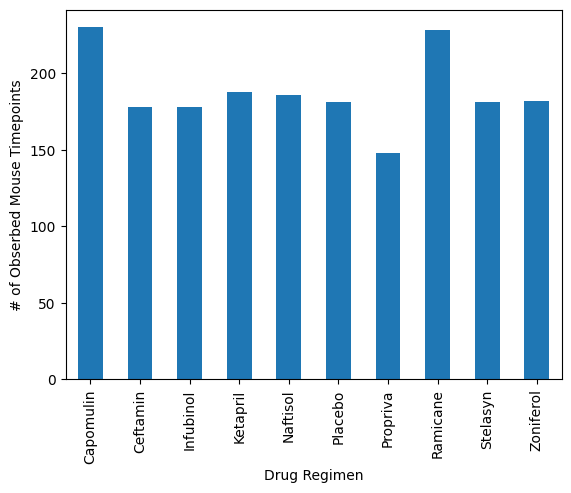

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mouse_bar = clean_data.groupby(['Drug Regimen']).count()['Timepoint']

plt.xlabel("Drug Regimen")

plt.ylabel("# of Obserbed Mouse Timepoints")

mouse_bar.plot.bar()



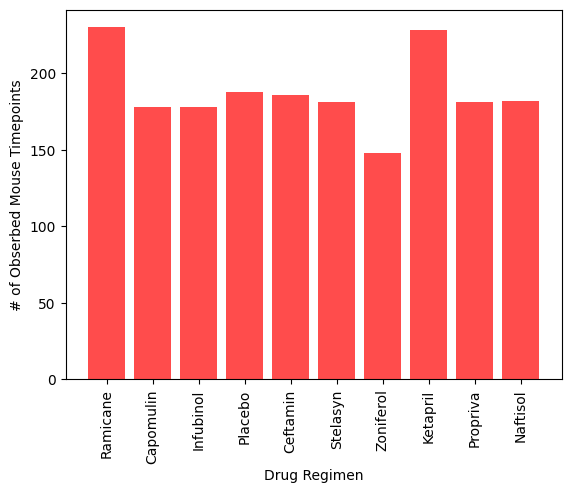

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_x = clean_data["Drug Regimen"].unique()

bar_y = clean_data.groupby(['Drug Regimen']).count()['Timepoint']

plt.xlabel("Drug Regimen")

plt.ylabel("# of Obserbed Mouse Timepoints")

plt.bar(bar_x, bar_y, color = "Red", alpha = 0.70, align = "center")

plt.xticks(clean_data["Drug Regimen"].unique(), rotation = 90)

plt.show()




<Axes: ylabel='count'>

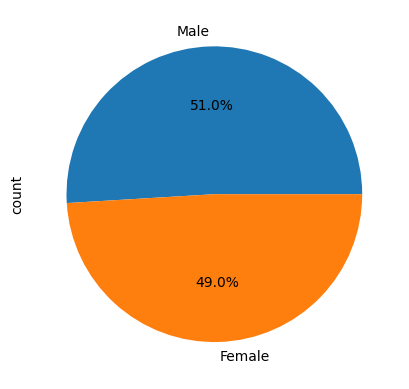

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_split = clean_data["Sex"].value_counts()

sex_split.plot.pie(autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x24973eb0230>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153964, 0.5997285948997549, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

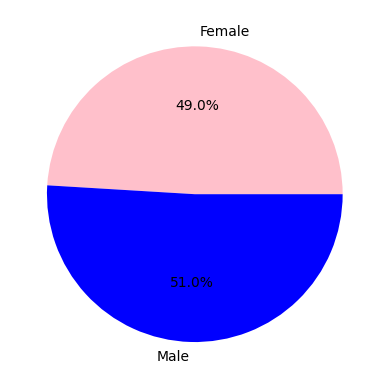

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_values = clean_data.groupby(["Sex"])["Mouse ID"].count().reset_index(name = "Counts by Sex")

pie_counts = sex_values["Counts by Sex"]

pie_labels = sex_values["Sex"]

colors = ["pink" , "blue"]

plt.pie(pie_counts,labels = pie_labels, colors = colors, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_lookups=clean_data.loc[(clean_data["Drug Regimen"]=="Capomulin")|(clean_data["Drug Regimen"]=="Ramicane")|(clean_data["Drug Regimen"]=="Infubinol")|(clean_data["Drug Regimen"]=="Ceftamin") ,:]

# Start by getting the last (greatest) timepoint for each mouse
regimen_lookups = regimen_lookups.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
regimen_lookups=pd.merge(regimen_lookups,clean_data[["Mouse ID","Timepoint","Tumor Volume (mm3)"]],on=["Mouse ID","Timepoint"],how="left")
regimen_lookups

,Mouse ID,Timepoint,Tumor Volume (mm3)
0,a203,45,67.973419
1,a251,45,65.525743
2,a275,45,62.999356
3,a411,45,38.407618
4,a444,45,43.047543
...,...,...,...
95,y769,45,68.594745
96,y793,45,31.896238
97,y865,45,64.729837
98,z578,45,30.638696


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


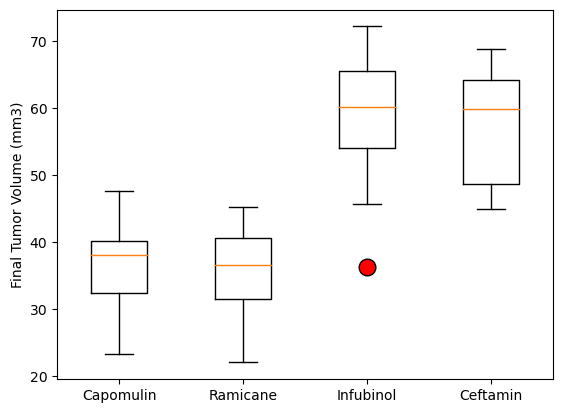

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

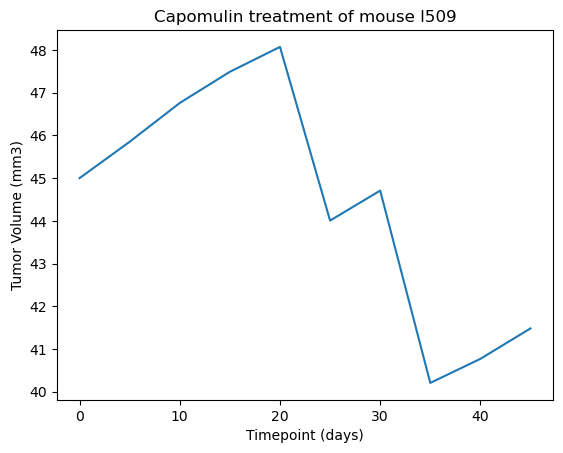

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


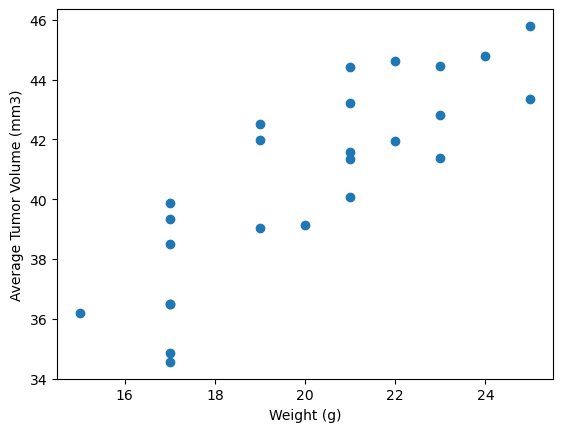

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


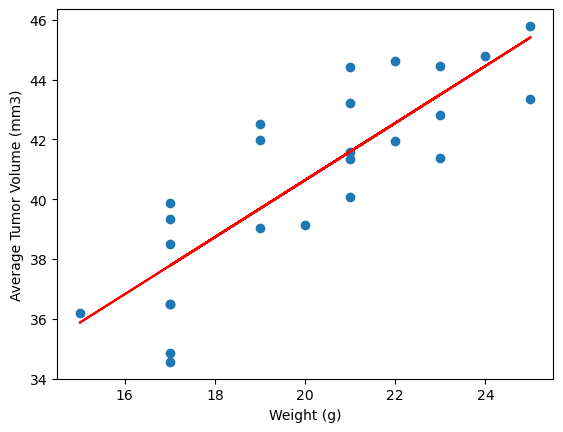

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
